In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as root_find
%matplotlib inline

## 1.1 Birthday Problem

In [17]:
def equal_any(array):
    '''
    Checks if any two elements of an array are equal
    
    Params: 
        array - (iterable) array to check
    Returns:
        - (bool) True if duplicate present. Else, false
    '''
    temp = np.array(array)
    for i in range(array.size-1):
        temp = np.roll(temp, 1)

        if (temp==array).any():
            return True
    
    return False

def make_plot(title='', x_label='', y_label='', z_label='', x_lim=(0, 0), y_lim=(0,0), z_lim=(0,0), 
              grid=True, size=(6, 4), dpi=115, three_d=False):
    '''
    Generates a plot object
    
    Parameters:
        title - (string) title of the plot
        x - (float) a list of values for omega/omega_0
        y - (float) a list of values for the amplitude
        xlim - (float) the limit for the x axis, this is a list containing 2 variables, 
                    the max and min value of x
        ylim - (float) the limit for the y axis, this is a list containing 2 variables, 
                    the max and min value of y
        size - (int) resizing the figure of the plot
        dpi - (int) increasing the quality of the image produced
    Returns:
        plot - (object) the plot
    '''
    fig = plt.figure(figsize=(size[0], size[1]), dpi=dpi)
    plot = fig.add_subplot(111) if not three_d else fig.add_subplot(111, projection='3d')
    
    plot.set_title(title)
    if y_lim[0] != 0 and y_lim[1] !=0: plot.set_ylim(y_lim[0], y_lim[1])
    if x_lim[0] != 0 and x_lim[1] !=0: plot.set_xlim(x_lim[0], x_lim[1])
    if z_lim[0] != 0 and z_lim[1] !=0: plot.set_zlim(z_lim[0], z_lim[1])
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    if three_d: plot.set_zlabel(z_label)
    if grid: plt.grid()
    
    return plot

def birthday_paradox(npeople, ntrials=10000, verbose=False):
    '''
    Runs a simulation of the birthday paradox, where the probability of at least two
    people out of a crowd having the same birthday is recorded
    
    Params: 
        npeople - (int) Number of people in the crowd
        ntrials - (int) Optional. Number of trials to run the simulation for
        verbose - (bool) Optional. Set to true to print results
    Returns:
        event_counter - (float) Probability of event occuring
    '''
    # One event is described as having at least one matching pair of birthdays in
    # a 30 day sample
    event_counter = 0
    
    for i in range(ntrials):
        days = np.random.choice(365, npeople)
        event_counter += 1 if equal_any(days) else 0
    
    if verbose:print("The fraction of trials for", npeople, "people with at least one matching birthday is", event_counter/ntrials)
    
    return event_counter/ntrials

The fraction of trials for 30 people with at least one matching birthday is 0.7081


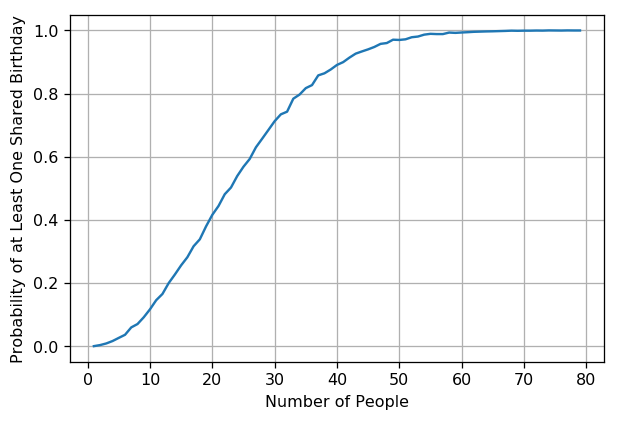

In [18]:
birthday_paradox(30, verbose=True)


x = range(1, 80)
y = [birthday_paradox(i, ntrials=5000) for i in x]

make_plot(x_label="Number of People", y_label="Probability of at Least One Shared Birthday").plot(x, y);

The following is equivalent to approximately 71% of the trials having a matching pair. Counter-intuitively, the probability of this occuring is over 50%. This is in fact a well known example of probabilities, and is due to the fact that we're looking for at least 1 pair. The probability of havings a lot of pairs 

$$P(X\geq 2)= P(X=2)+P(X=3)+\ldots$$